In [1]:
import pandas as pd
churn_data = pd.read_csv(r'C:\Users\seans\Documents\WGU\D206\churn_raw_data.csv')
print(churn_data)
churn_data.info()

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [2]:
pd.set_option('display.max_columns', 52)
print (churn_data.head(2))

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   

          City State                 County    Zip       Lat        Lng  \
0  Point Baker    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571   
1  West Branch    MI                 Ogemaw  48661  44.32893  -84.24080   

   Population   Area         Timezone                                Job  \
0          38  Urban    America/Sitka  Environmental health practitioner   
1       10446  Urban  America/Detroit             Programmer, multimedia   

   Children   Age                    Education Employment    Income  Marital  \
0       NaN  68.0              Master's Degree  Part Time  28561.99  Widowed   
1       1.0  27.0  Regular High School Diploma    Retired  21704.77  Married   

   Gender Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_fa

In [3]:
# Import Packages
import numpy as np
import scipy as sp
import scipy.stats as stats
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as mpl
import seaborn
# define customer id as our key to see if there are duplicate rows to identify
id = churn_data.Customer_id
id.is_unique
# View table and data types
print(churn_data)
# check for equal values, should be 10000 with header
print(churn_data.head(2))

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [4]:
#The eight survey items were not labeled properly and need to fixed
churn_data.rename(columns = 
{'item1':'item1_responses',
'item2':'item2_fixes',
'item3':'item3_replacements',
'item4':'item4_reliability',
'item5':'item5_options',
'item6':'item6_respectfulness',
'item7':'item7_courteous',
'item8':'item8_listening'},
inplace=True)
print(churn_data.head(2))

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   

          City State                 County    Zip       Lat        Lng  \
0  Point Baker    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571   
1  West Branch    MI                 Ogemaw  48661  44.32893  -84.24080   

   Population   Area         Timezone                                Job  \
0          38  Urban    America/Sitka  Environmental health practitioner   
1       10446  Urban  America/Detroit             Programmer, multimedia   

   Children   Age                    Education Employment    Income  Marital  \
0       NaN  68.0              Master's Degree  Part Time  28561.99  Widowed   
1       1.0  27.0  Regular High School Diploma    Retired  21704.77  Married   

   Gender Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_fa

In [5]:
#Time to find data types
churn_data.count()
churn_data.dtypes
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [6]:
#Let's view duplicates
print(churn_data.duplicated().value_counts())

False    10000
dtype: int64


In [7]:
# Code to mitigate duplicates, but we have none! Yay!
churn_data.drop_duplicates
churn_data = churn_data.drop_duplicates()
print(churn_data.duplicated().value_counts())

False    10000
dtype: int64


Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

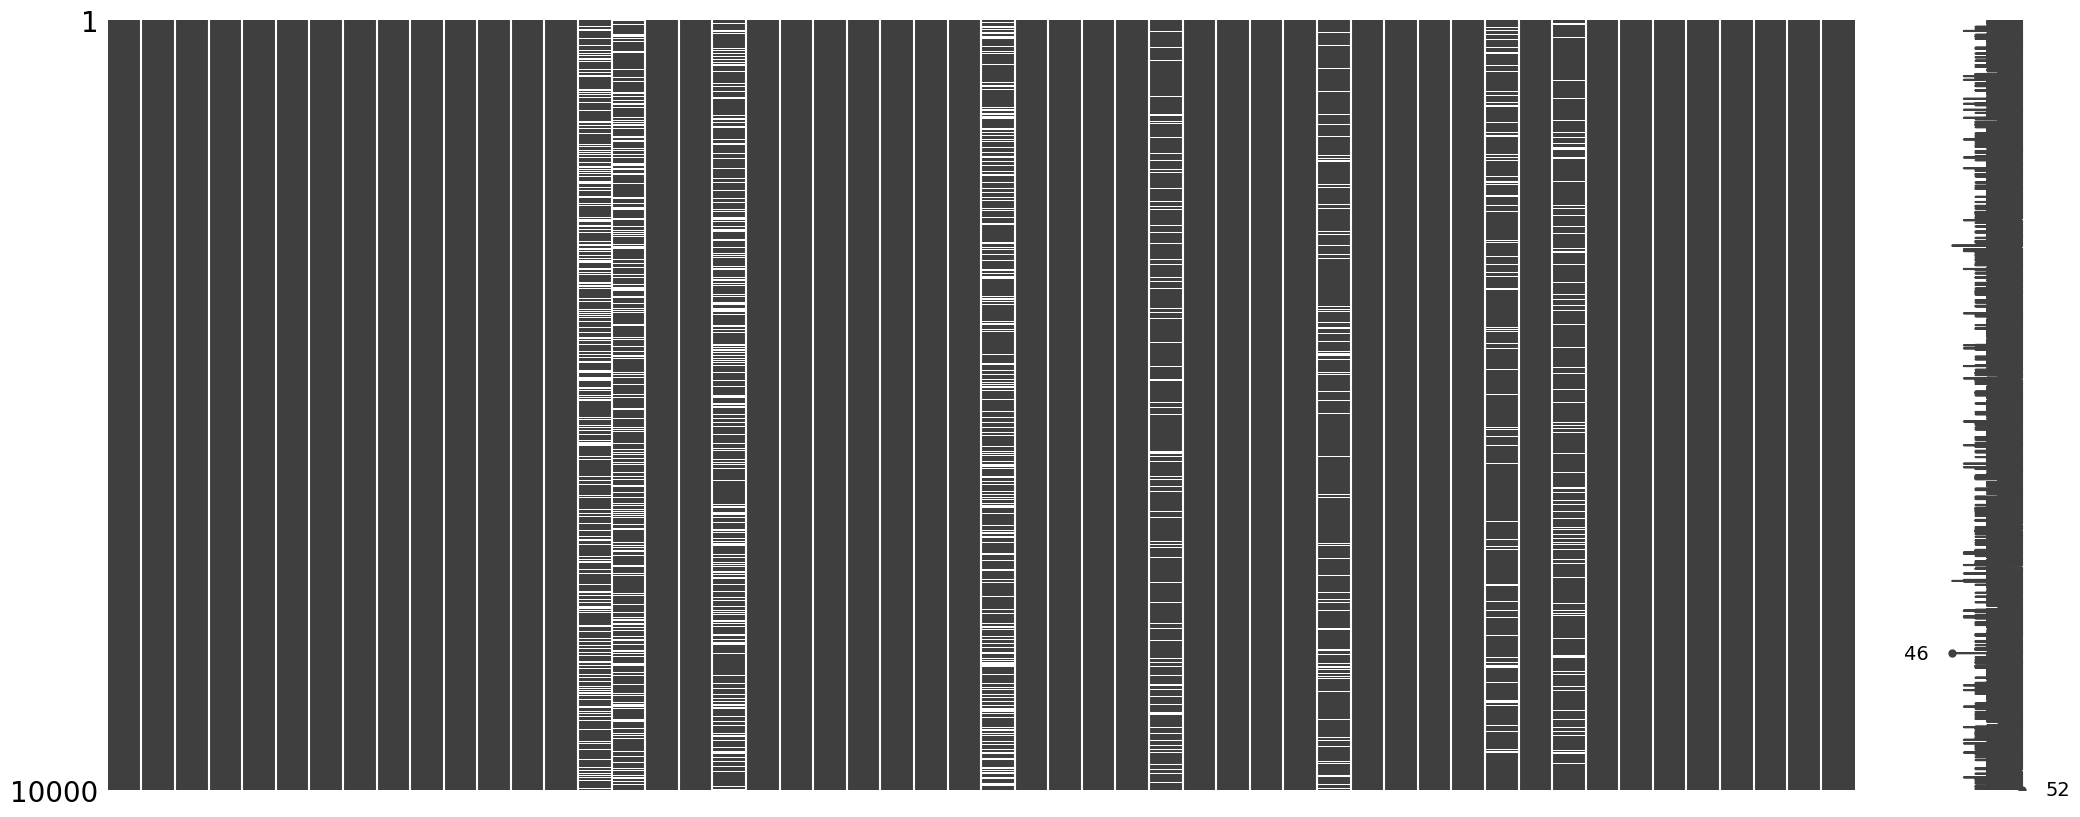

In [8]:
#to find missing values
import missingno as msno
msno.matrix(churn_data)
churn_data.isnull().sum()

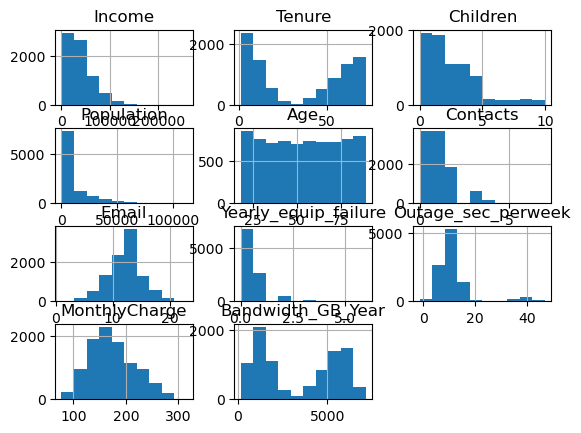

In [9]:
#Let's view some columns for missing information
churn_data[['Income', 'Tenure', 'Children', 'Population', 'Age', 'Contacts', 'Email', 'Yearly_equip_failure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
mpl.show()

In [10]:
#Mitigating Missing Values
churn_data['Children'].fillna(churn_data['Children'].median(), inplace=True)
churn_data['Age'].fillna(churn_data['Age'].median(), inplace=True)
churn_data['Income'].fillna(churn_data['Income'].median(), inplace=True)
churn_data['Techie'].fillna(churn_data['Techie'].mode()[0], inplace=True)
churn_data['Phone'].fillna(churn_data['Phone'].mode()[0], inplace=True)
churn_data['TechSupport'].fillna(churn_data['TechSupport'].mode()[0], inplace=True)
churn_data['Tenure'].fillna(churn_data['Tenure'].median(), inplace=True)
churn_data['Bandwidth_GB_Year'].fillna(churn_data['Bandwidth_GB_Year'].median(), inplace=True)

#Here, we can now check for null values
print(churn_data.isnull().sum())


Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

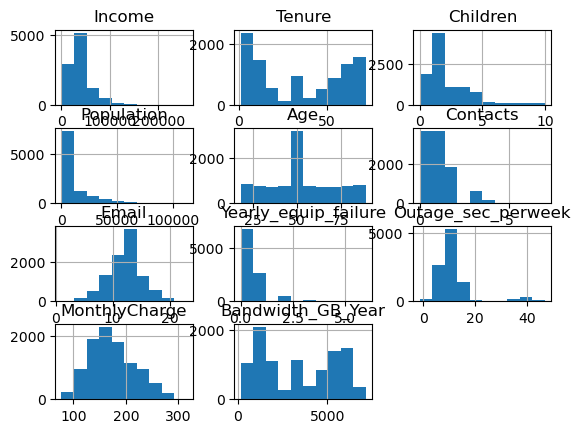

In [11]:
#Let's view the same columns for missing information now
churn_data[['Income', 'Tenure', 'Children', 'Population', 'Age', 'Contacts', 'Email', 'Yearly_equip_failure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
mpl.show()

In [12]:
#Check for the distinct values in each column to inform the categorical replacements
print(churn_data['Employment'].unique())
print(churn_data['Area'].unique())
print(churn_data['Education'].unique())
print(churn_data['Marital'].unique())
print(churn_data['Gender'].unique())
print(churn_data['Contract'].unique())
print(churn_data['PaymentMethod'].unique())
print(churn_data['InternetService'].unique())

['Part Time' 'Retired' 'Student' 'Full Time' 'Unemployed']
['Urban' 'Suburban' 'Rural']
["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
['Male' 'Female' 'Prefer not to answer']
['One year' 'Month-to-month' 'Two Year']
['Credit Card (automatic)' 'Bank Transfer(automatic)' 'Mailed Check'
 'Electronic Check']
['Fiber Optic' 'DSL' 'None']


In [13]:
#Replace categorical values
churn_data['Churn_numeric'] = churn_data['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Churn, inplace=True)

churn_data['Employment_numeric'] = churn_data['Employment']
dict_Employment = {"Employment_numeric": {"Part Time": 0, "Retired": 1, "Student": 2, "Full Time": 3, "Unemployed": 4}}
churn_data.replace(dict_Employment, inplace=True)

churn_data['Area_numeric'] = churn_data['Area']
dict_Area = {"Area_numeric": {"Urban": 0, "Suburban": 1, "Rural": 2}}
churn_data.replace(dict_Area, inplace=True)

churn_data['Education_numeric'] = churn_data['Education']
dict_Education = {"Education_numeric": {"Master's Degree": 0, "Regular High School Diploma": 1, "Doctorate Degree": 2, "No Schooling Completed": 3, "Associate's Degree": 4, "Bachelor's Degree": 5, "Some College, Less than 1 Year": 6, "GED or Alternative Credential": 7, "Some College, 1 or More Years, No Degree": 8, "Nursery School to 8th Grade": 9, "9th Grade to 12th Grade, No Diploma": 10, "Professional School Degree": 11}}
churn_data.replace(dict_Education, inplace=True)

churn_data['Marital_numeric'] = churn_data['Marital']
dict_Marital = {"Marital_numeric": {"Widowed": 0, "Married": 1, "Separated": 2, "Never Married": 3, "Divorced": 4}}
churn_data.replace(dict_Marital, inplace=True)

churn_data['Gender_numeric'] = churn_data['Gender']
dict_Gender = {"Gender_numeric": {"Male": 0, "Female": 1, "Prefer not to answer": 2}}
churn_data.replace(dict_Gender, inplace=True)

churn_data['Contract_numeric'] = churn_data['Contract']
dict_Contract = {"Contract_numeric": {"One year": 0, "Month-to-month": 1, "Two Year": 2}}
churn_data.replace(dict_Contract, inplace=True)

churn_data['PaymentMethod_numeric'] = churn_data['PaymentMethod']
dict_PaymentMethod = {"PaymentMethod_numeric": {"Credit Card (automatic)": 0, "Bank Transfer(automatic)": 1, "Mailed Check": 2, "Electronic Check": 3}}
churn_data.replace(dict_PaymentMethod, inplace=True)

churn_data['InternetService_numeric'] = churn_data['InternetService']
dict_InternetService = {"InternetService_numeric": {"Fiber Optic": 0, "DSL": 1, "None": 2}}
churn_data.replace(dict_InternetService, inplace=True)

churn_data['Techie_numeric'] = churn_data['Techie']
dict_Techie = {"Techie_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Techie, inplace=True)

churn_data['Port_modem_numeric'] = churn_data['Port_modem']
dict_Port_modem = {"Port_modem_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Port_modem, inplace=True)

churn_data['Tablet_numeric'] = churn_data['Tablet']
dict_Tablet = {"Tablet_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Tablet, inplace=True)

churn_data['Phone_numeric'] = churn_data['Phone']
dict_Phone = {"Phone_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Phone, inplace=True)

churn_data['Multiple_numeric'] = churn_data['Multiple']
dict_Multiple = {"Multiple_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Multiple, inplace=True)

churn_data['OnlineSecurity_numeric'] = churn_data['OnlineSecurity']
dict_OnlineSecurity = {"OnlineSecurity_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_OnlineSecurity, inplace=True)

churn_data['OnlineBackup_numeric'] = churn_data['OnlineBackup']
dict_OnlineBackup = {"OnlineBackup_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_OnlineBackup, inplace=True)

churn_data['DeviceProtection_numeric'] = churn_data['DeviceProtection']
dict_DeviceProtection = {"DeviceProtection_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_DeviceProtection, inplace=True)

churn_data['TechSupport_numeric'] = churn_data['TechSupport']
dict_TechSupport = {"TechSupport_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_TechSupport, inplace=True)

churn_data['StreamingTV_numeric'] = churn_data['StreamingTV']
dict_StreamingTV = {"StreamingTV_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_StreamingTV, inplace=True)

churn_data['Churn_numeric'] = churn_data['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Churn, inplace=True)

churn_data['StreamingMovies_numeric'] = churn_data['StreamingMovies']
dict_StreamingMovies = {"StreamingMovies_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_StreamingMovies, inplace=True)

churn_data['PaperlessBilling_numeric'] = churn_data['PaperlessBilling']
dict_PaperlessBilling = {"PaperlessBilling_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_PaperlessBilling, inplace=True)

<bound method NDFrame.head of          Income  z_score_Income
0     28561.990       -0.391731
1     21704.770       -0.668828
2     33186.785       -0.204845
3     18925.230       -0.781148
4     40074.190        0.073471
...         ...             ...
9995  55723.740        0.705863
9996  33186.785       -0.204845
9997  33186.785       -0.204845
9998  16667.580       -0.872379
9999  33186.785       -0.204845

[10000 rows x 2 columns]>


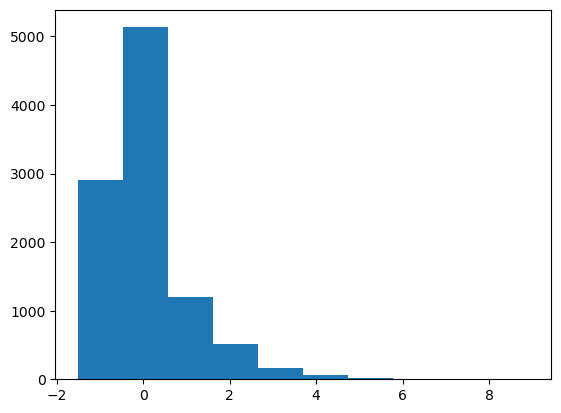

In [14]:
from pandas import DataFrame
import scipy.stats as stats
churn_data['z_score_Income'] = stats.zscore(churn_data['Income'])
print(churn_data[['Income','z_score_Income']].head)
mpl.hist(churn_data['z_score_Income'])
mpl.show()

<bound method NDFrame.head of       Children  z_score_Children
0          1.0         -0.427079
1          1.0         -0.427079
2          4.0          1.130655
3          1.0         -0.427079
4          0.0         -0.946323
...        ...               ...
9995       3.0          0.611410
9996       4.0          1.130655
9997       1.0         -0.427079
9998       1.0         -0.427079
9999       1.0         -0.427079

[10000 rows x 2 columns]>


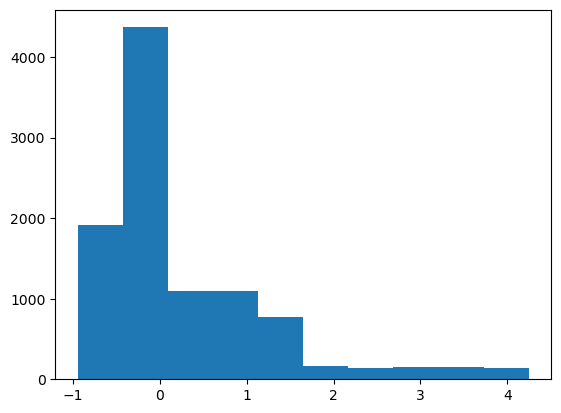

In [15]:
churn_data['z_score_Children']=stats.zscore(churn_data['Children'])
print(churn_data[['Children','z_score_Children']].head)
mpl.hist(churn_data['z_score_Children'])
mpl.show()

<bound method NDFrame.head of          Tenure  z_score_Tenure
0      6.795513       -1.106419
1      1.156681       -1.330346
2     15.754144       -0.750657
3     17.087227       -0.697719
4      1.670972       -1.309923
...         ...             ...
9995  68.197130        1.331938
9996  61.040370        1.047731
9997  36.196030        0.061123
9998  71.095600        1.447041
9999  63.350860        1.139485

[10000 rows x 2 columns]>


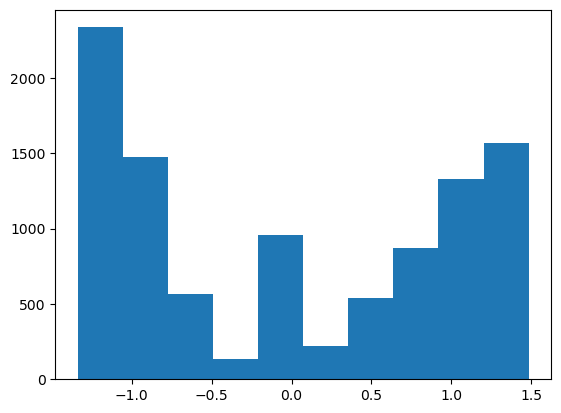

In [16]:
churn_data['z_score_Tenure']=stats.zscore(churn_data['Tenure'])
print(churn_data[['Tenure','z_score_Tenure']].head)
mpl.hist(churn_data['z_score_Tenure'])
mpl.show()

<bound method NDFrame.head of       Population  z_score_Population
0             38           -0.673405
1          10446            0.047772
2           3735           -0.417238
3          13863            0.284537
4          11352            0.110549
...          ...                 ...
9995         640           -0.631692
9996       77168            4.670977
9997         406           -0.647906
9998       35575            1.788974
9999       12230            0.171386

[10000 rows x 2 columns]>


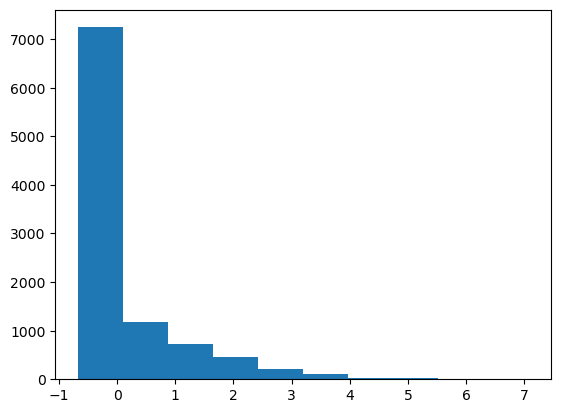

In [17]:
churn_data['z_score_Population']=stats.zscore(churn_data['Population'])
print(churn_data[['Population','z_score_Population']].head)
mpl.hist(churn_data['z_score_Population'])
mpl.show()

<bound method NDFrame.head of        Age  z_score_Age
0     68.0     0.821689
1     27.0    -1.455765
2     50.0    -0.178169
3     48.0    -0.289264
4     83.0     1.654904
...    ...          ...
9995  53.0    -0.011526
9996  48.0    -0.289264
9997  53.0    -0.011526
9998  39.0    -0.789193
9999  28.0    -1.400218

[10000 rows x 2 columns]>


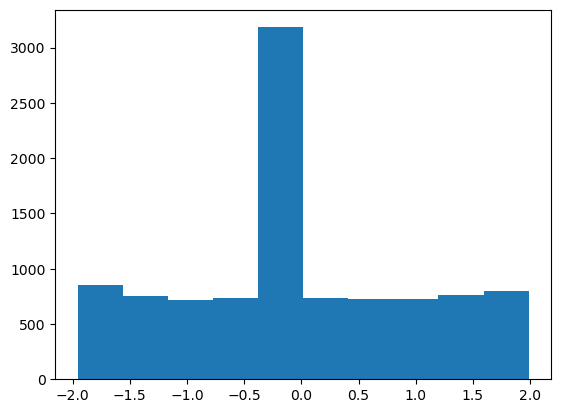

In [18]:
churn_data['z_score_Age']=stats.zscore(churn_data['Age'])
print(churn_data[['Age','z_score_Age']].head)
mpl.hist(churn_data['z_score_Age'])
mpl.show()

<bound method NDFrame.head of       Contacts  z_score_Contacts
0            0         -1.005852
1            0         -1.005852
2            0         -1.005852
3            2          1.017588
4            2          1.017588
...        ...               ...
9995         2          1.017588
9996         2          1.017588
9997         0         -1.005852
9998         1          0.005868
9999         1          0.005868

[10000 rows x 2 columns]>


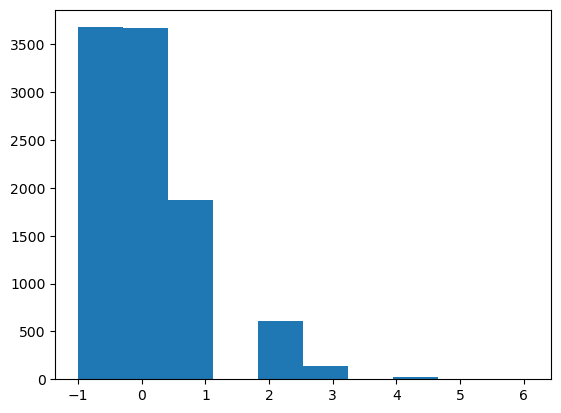

In [19]:
churn_data['z_score_Contacts']=stats.zscore(churn_data['Contacts'])
print(churn_data[['Contacts','z_score_Contacts']].head)
mpl.hist(churn_data['z_score_Contacts'])
mpl.show()

<bound method NDFrame.head of       Email  z_score_Email
0        10      -0.666282
1        12      -0.005288
2         9      -0.996779
3        15       0.986203
4        16       1.316700
...     ...            ...
9995     12      -0.005288
9996     15       0.986203
9997     10      -0.666282
9998     14       0.655706
9999     17       1.647197

[10000 rows x 2 columns]>


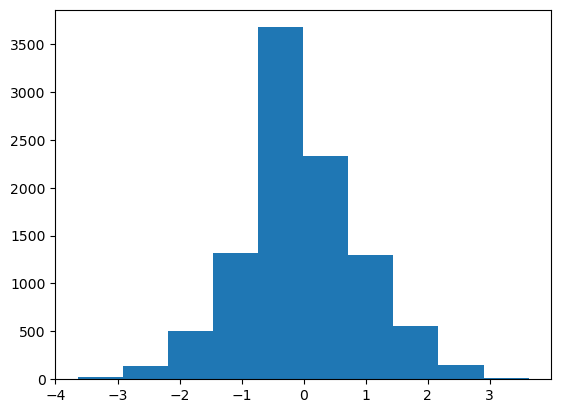

In [20]:
churn_data['z_score_Email']=stats.zscore(churn_data['Email'])
print(churn_data[['Email','z_score_Email']].head)
mpl.hist(churn_data['z_score_Email'])
mpl.show()

<bound method NDFrame.head of       Yearly_equip_failure  z_score_Yearly_equip_failure
0                        1                      0.946658
1                        1                      0.946658
2                        1                      0.946658
3                        0                     -0.625864
4                        1                      0.946658
...                    ...                           ...
9995                     0                     -0.625864
9996                     0                     -0.625864
9997                     0                     -0.625864
9998                     0                     -0.625864
9999                     0                     -0.625864

[10000 rows x 2 columns]>


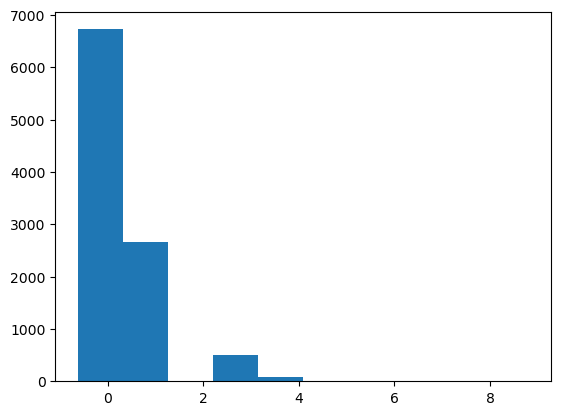

In [21]:
churn_data['z_score_Yearly_equip_failure']=stats.zscore(churn_data['Yearly_equip_failure'])
print(churn_data[['Yearly_equip_failure','z_score_Yearly_equip_failure']].head)
mpl.hist(churn_data['z_score_Yearly_equip_failure'])
mpl.show()

<bound method NDFrame.head of       Outage_sec_perweek  z_score_Outage_sec_perweek
0               6.972566                   -0.637726
1              12.014541                    0.079935
2              10.245616                   -0.171849
3              15.206193                    0.534225
4               8.960316                   -0.354795
...                  ...                         ...
9995            9.265392                   -0.311372
9996            8.115849                   -0.474994
9997            4.837696                   -0.941598
9998           12.076460                    0.088748
9999           12.641760                    0.169211

[10000 rows x 2 columns]>


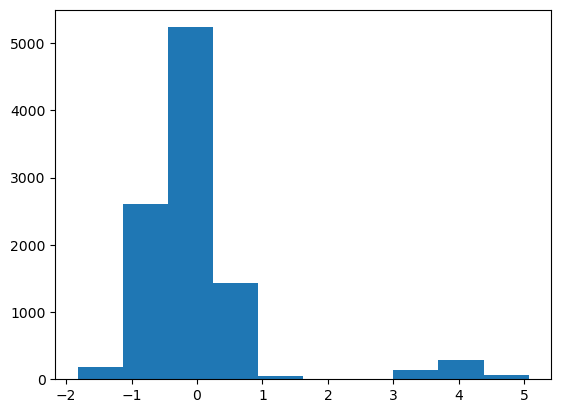

In [22]:
churn_data['z_score_Outage_sec_perweek']=stats.zscore(churn_data['Outage_sec_perweek'])
print(churn_data[['Outage_sec_perweek','z_score_Outage_sec_perweek']].head)
mpl.hist(churn_data['z_score_Outage_sec_perweek'])
mpl.show()

<bound method NDFrame.head of       MonthlyCharge  z_score_MonthlyCharge
0        171.449762              -0.060613
1        242.948015               1.589348
2        159.440398              -0.337752
3        120.249493              -1.242158
4        150.761216              -0.538041
...             ...                    ...
9995     159.828800              -0.328789
9996     208.856400               0.802618
9997     168.220900              -0.135125
9998     252.628600               1.812746
9999     218.371000               1.022186

[10000 rows x 2 columns]>


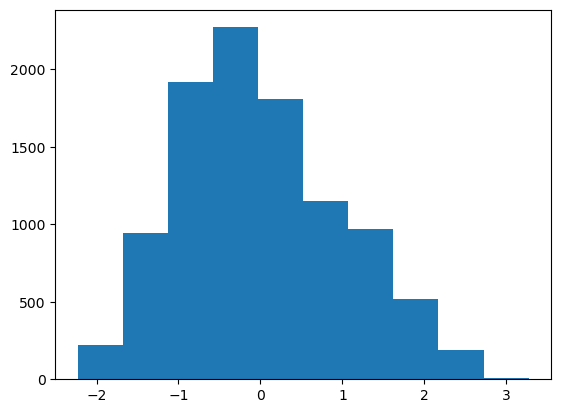

In [23]:
churn_data['z_score_MonthlyCharge']=stats.zscore(churn_data['MonthlyCharge'])
print(churn_data[['MonthlyCharge','z_score_MonthlyCharge']].head)
mpl.hist(churn_data['z_score_MonthlyCharge'])
mpl.show()

<bound method NDFrame.head of       Bandwidth_GB_Year  z_score_Bandwidth_GB_Year
0            904.536110                  -1.202650
1            800.982766                  -1.252613
2           2054.706961                  -0.647713
3           2164.579412                  -0.594701
4            271.493436                  -1.508082
...                 ...                        ...
9995        6511.253000                   1.502492
9996        5695.952000                   1.109123
9997        4159.306000                   0.367719
9998        6468.457000                   1.481843
9999        5857.586000                   1.187109

[10000 rows x 2 columns]>


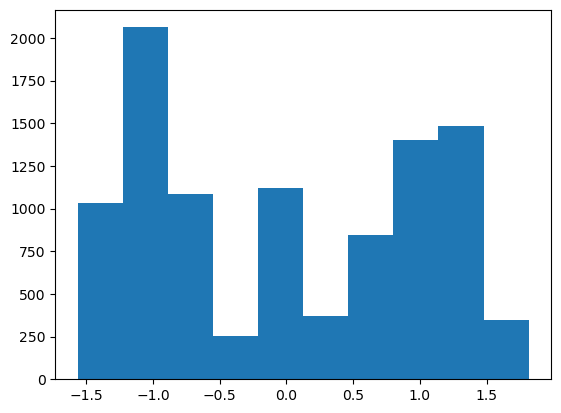

In [24]:
churn_data['z_score_Bandwidth_GB_Year']=stats.zscore(churn_data['Bandwidth_GB_Year'])
print(churn_data[['Bandwidth_GB_Year','z_score_Bandwidth_GB_Year']].head)
mpl.hist(churn_data['z_score_Bandwidth_GB_Year'])
mpl.show()

In [25]:
churn_data.to_csv(r'C:\Users\seans\Documents\WGU\D206\churn_data_cleaned.csv')

In [26]:
#Let's do some PCA analysis
from sklearn.decomposition import PCA
import seaborn as sns
churn_pca = churn_data[['Income', 'Tenure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
churn_normalized=(churn_pca-churn_pca.mean())/churn_pca.std()
pca = PCA(n_components=churn_pca.shape[1])
pca.fit(churn_normalized)
churn_pca1 = pd.DataFrame(pca.transform(churn_normalized),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [27]:
#Loadings
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
index=churn_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Income,0.005975,-0.001356,0.997951,-0.063676,0.000843
Tenure,0.705360,-0.057918,-0.001425,0.035745,-0.705573
Outage_sec_perweek,0.022378,0.705639,0.045918,0.706728,0.000158
MonthlyCharge,0.045469,0.706129,-0.044166,-0.703600,-0.048063
Bandwidth_GB_Year,0.707010,-0.009953,-0.005625,-0.012242,0.707005


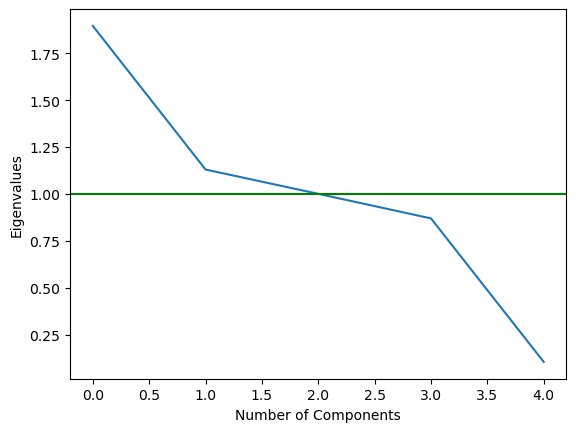

In [28]:
#Now we need to select our most important PC's.
churn_matrix = np.dot(churn_normalized.T, churn_normalized) / churn_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(churn_matrix, eigenvector)) for eigenvector in pca.components_]
mpl.plot(eigenvalues)
mpl.xlabel('Number of Components')
mpl.ylabel('Eigenvalues')
mpl.axhline(y=1, color="green")
mpl.show()